<a href="https://colab.research.google.com/github/Tony607/object_detection_demo/blob/master/tensorflow_object_detection_training_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to train an object detection model easy for free](https://www.dlology.com/blog/how-to-train-an-object-detection-model-easy-for-free/) | DLology Blog

## Configs and Hyperparameters

Support a variety of models, you can find more pretrained model from [Tensorflow detection model zoo: COCO-trained models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md#coco-trained-models), as well as their pipline config files in [object_detection/samples/configs/](https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs).

In [2]:
# If you forked the repository, you can replace the link.
repo_url = 'https://github.com/Tony607/object_detection_demo'

# Number of training steps.
num_steps = 20000  # 200000

# Number of evaluation steps.
num_eval_steps = 50

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    }
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'ssd_mobilenet_v2'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colabe's Tesla K80 GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

## Clone the `object_detection_demo` repository or your fork.

## Install required packages

In [3]:
# %cd /home/ghost/Desktop/experiment/

# !git clone https://github.com/tensorflow/models.git

# !apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

# !pip install -q Cython contextlib2 pillow lxml matplotlib

# !pip install -q pycocotools

%cd /home/ghost/Desktop/experiment/models/research

! python setup.py build

! python setup.py install

%cd /home/ghost/Desktop/experiment/models/research/slim

! pip install -e .

%cd /home/ghost/Desktop/experiment/models/research

!protoc object_detection/protos/*.proto --python_out=.

!export PYTHONPATH=$PYTHONPATH:/home/ghost/Desktop/experiment/models/research/:/home/ghost/Desktop/experiment/models/research/slim
        
! ls

!python object_detection/builders/model_builder_test.py

/home/ghost/Desktop/experiment/models/research
running build
running build_py
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/post_processing_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/region_similarity_calculator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/square_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/input_reader_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/image_resizer_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/grid_anchor_generator_pb2.py -> build/l

copying build/lib/object_detection/models/keras_models/test_utils.py -> build/bdist.linux-x86_64/egg/object_detection/models/keras_models
copying build/lib/object_detection/models/keras_models/__init__.py -> build/bdist.linux-x86_64/egg/object_detection/models/keras_models
copying build/lib/object_detection/models/keras_models/resnet_v1.py -> build/bdist.linux-x86_64/egg/object_detection/models/keras_models
copying build/lib/object_detection/models/keras_models/inception_resnet_v2.py -> build/bdist.linux-x86_64/egg/object_detection/models/keras_models
copying build/lib/object_detection/models/keras_models/mobilenet_v2.py -> build/bdist.linux-x86_64/egg/object_detection/models/keras_models
copying build/lib/object_detection/models/ssd_mobilenet_v1_ppn_feature_extractor.py -> build/bdist.linux-x86_64/egg/object_detection/models
copying build/lib/object_detection/models/faster_rcnn_inception_resnet_v2_feature_extractor.py -> build/bdist.linux-x86_64/egg/object_detection/models
copying bui

creating build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/inference/detection_inference.py -> build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/inference/__init__.py -> build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/inference/detection_inference_test.py -> build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/inference/infer_detections.py -> build/bdist.linux-x86_64/egg/object_detection/inference
copying build/lib/object_detection/model_hparams.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/metrics
copying build/lib/object_detection/metrics/oid_vrd_challenge_evaluation_utils.py -> build/bdist.linux-x86_64/egg/object_detection/metrics
copying build/lib/object_detection/metrics/calibration_metrics.py -> build/bdist.linux-x86_64/egg/object_detection/metrics
copying bui

copying build/lib/object_detection/core/box_predictor.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/multiclass_nms_test.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/keypoint_ops.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/core/losses_test.py -> build/bdist.linux-x86_64/egg/object_detection/core
copying build/lib/object_detection/__init__.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_tpu_main.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/eval_util.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/box_coders
copying build/lib/object_detection/box_coders/keypoint_box_coder.py -> build/bdist.linux-x86_64/egg/object_detection/box_coders
copying build/lib/object_detection/box_coders/mean_stddev_box_co

byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/mobilenet_v2_test.py to mobilenet_v2_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/mobilenet_v1_test.py to mobilenet_v1_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/model_utils.py to model_utils.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/mobilenet_v1.py to mobilenet_v1.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/test_utils.py to test_utils.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/__init__.py to __init__.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/resnet_v1.py to resnet_v1.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/models/keras_models/inception_resnet_v2.py 

byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/ssd_pb2.py to ssd_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/mean_stddev_box_coder_pb2.py to mean_stddev_box_coder_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/losses_pb2.py to losses_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/model_pb2.py to model_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/eval_pb2.py to eval_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/box_coder_pb2.py to box_coder_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/string_int_label_map_pb2.py to string_int_label_map_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/protos/target_assigner_pb2.py to target_assigner_pb2.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/eg

byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/faster_rcnn_meta_arch_test_lib.py to faster_rcnn_meta_arch_test_lib.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/ssd_meta_arch_test.py to ssd_meta_arch_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/__init__.py to __init__.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/ssd_meta_arch_test_lib.py to ssd_meta_arch_test_lib.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/export_inference_graph.py to export_inference_graph.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/legacy/train.py to train.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/legacy/eval.py to eval.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/legacy/trainer.py to trainer.cpython-37.pyc

byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/autoaugment_utils.py to autoaugment_utils.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/context_manager.py to context_manager.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/category_util_test.py to category_util_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/context_manager_test.py to context_manager_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/object_detection_evaluation_test.py to object_detection_evaluation_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_box_list_test.py to np_box_list_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_box_list_ops_test.py to np_box_list_ops_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/ops.py to ops.cpython-37.py

byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/box_coder_test.py to box_coder_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/preprocessor_test.py to preprocessor_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/prefetcher.py to prefetcher.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/minibatch_sampler.py to minibatch_sampler.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/preprocessor.py to preprocessor.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/losses.py to losses.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/target_assigner_test.py to target_assigner_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/batcher_test.py to batcher_test.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/core/class_

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Running tests under Python 3.7.4: /home/ghost/anaconda3/envs/dtoxd/bin/python
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
/home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/tensorflow_core/python/training/tracking/data_structures.py:669: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(wrapped_dict, collections.Mapping):
[       OK ] Mo

## Prepare `tfrecord` files

Use the following scripts to generate the `tfrecord` files.
```bash
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt
```

In [4]:
repo_dir_path = "/home/ghost/Desktop/object_detection_demo/"

%cd {repo_dir_path}

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
!python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
!python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/home/ghost/Desktop/object_detection_demo
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
Successfully converted xml to csv.


W0208 12:14:02.475794 139967290468160 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0208 12:14:02.594295 139967290468160 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/utils/label_map_util.py:138: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /home/ghost/Desktop/object_detection_demo/data/annotations/train.record


W0208 12:14:04.996665 140045941552960 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0208 12:14:05.005386 140045941552960 module_wrapper.py:139] From /home/ghos

In [5]:
test_record_fname = '/home/ghost/Desktop/object_detection_demo/data/annotations/test.record'
train_record_fname = '/home/ghost/Desktop/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname = '/home/ghost/Desktop/object_detection_demo/data/annotations/label_map.pbtxt'

## Download base model

In [6]:
%cd /home/ghost/Desktop/experiment/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/home/ghost/Desktop/experiment/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/home/ghost/Desktop/experiment/models/research


In [7]:
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/home/ghost/Desktop/experiment/models/research/pretrained_model
total 135M
drwxr-xr-x  3 ghost ghost 4.0K Mar 30  2018 .
drwxr-xr-x 72 ghost ghost 4.0K Feb  8 12:15 ..
-rw-r--r--  1 ghost ghost   77 Mar 30  2018 checkpoint
-rw-r--r--  1 ghost ghost  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 ghost ghost  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 ghost ghost  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 ghost ghost 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 ghost ghost 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 ghost ghost 4.0K Mar 30  2018 saved_model


In [8]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/home/ghost/Desktop/experiment/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [9]:
import os
pipeline_fname = os.path.join('/home/ghost/Desktop/experiment/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [10]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [11]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)

In [12]:
!cat {pipeline_fname}

# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 1
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_

In [13]:
!pwd
model_dir = 'training/'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

/home/ghost/Desktop/experiment/models/research


## Run Tensorboard(Optional)

In [14]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2020-02-08 02:54:20--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.73.147.107, 35.168.165.30, 52.20.12.96, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.73.147.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M   270KB/s    in 52s     

2020-02-08 02:55:13 (258 KB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [15]:
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [16]:
get_ipython().system_raw('./ngrok http 6006 &')

### Get Tensorboard link

In [17]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


## Train the model

In [18]:
!pwd

%cd /home/ghost/Desktop/experiment/

! git clone https://github.com/cocodataset/cocoapi.git

%cd cocoapi/PythonAPI

!make

!python setup.py build

!python setup.py install

/home/ghost/Desktop/experiment/models/research
/home/ghost/Desktop/experiment
fatal: destination path 'cocoapi' already exists and is not an empty directory.
/home/ghost/Desktop/experiment/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/pycocotools/_mask.cpython-37m-x86_64-linux-gnu.so -> pycocotools
rm -rf build
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/pycocotools
copying pycocotools/mask.py -> build/lib.linux-x86_64-3.7/pycocotools
copying pycocotools/coco.py -> build/lib.linux-x86_64-3.7/pycocotools
copying pycocotools/__init__.py -> build/lib.linux-x86_64-3.7/pycocotools
copying pycocotools/cocoeval.py -> build/lib.linux-x86_64-3.7/pycocotools
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build/common
creatin

removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing pycocotools-2.0-py3.7-linux-x86_64.egg
removing '/home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/pycocotools-2.0-py3.7-linux-x86_64.egg' (and everything under it)
creating /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/pycocotools-2.0-py3.7-linux-x86_64.egg
Extracting pycocotools-2.0-py3.7-linux-x86_64.egg to /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages
pycocotools 2.0 is already the active version in easy-install.pth

Installed /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/pycocotools-2.0-py3.7-linux-x86_64.egg
Processing dependencies for pycocotools==2.0
Searching for matplotlib==3.1.1
Best match: matplotlib 3.1.1
Adding matplotlib 3.1.1 to easy-install.pth file

Using /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages
Searching for Cython==0.29.14
Best match: Cython 0.29.14
Adding Cython 0.29.14 to easy-install.pth file
Installing cygdb scr

In [14]:
!python /home/ghost/Desktop/experiment/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0208 12:18:24.932623 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0208 12:18:24.936157 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/model_lib.py:628: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0208 12:18:24.936297 140686456952640 model_lib.py:629] Forced numbe


W0208 12:18:24.968541 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:64: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.

W0208 12:18:24.969467 140686456952640 dataset_builder.py:72] num_readers has been reduced to 1 to match input file shards.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
W0208 12:18:24.975084 140686456952640 deprecation.py:323] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:86: parallel_interleave (from tensorflow.contrib.data.python.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, 

Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
W0208 12:18:47.999740 140686456952640 deprecation.py:323] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/builders/dataset_builder.py:158: batch_and_drop_remainder (from tensorflow.contrib.data.python.ops.batching) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
INFO:tensorflow:Calling model_fn.
I0208 12:18:48.012120 140686456952640 estimator.py:1148] Calling model_fn.

W0208 12:18:48.185981 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/meta_architectures/ssd_meta_arch.py:589: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.


W0208 12:18:48.186264 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs


W0208 12:18:55.035720 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/meta_architectures/ssd_meta_arch.py:1275: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.


W0208 12:18:55.038331 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/model_lib.py:380: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.


W0208 12:18:55.038654 140686456952640 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/utils/learning_schedules.py:66: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.


W0208 12:18:55.047102 140686456952640 module_wrapper.p

INFO:tensorflow:depth of additional conv before box predictor: 0
I0208 12:29:46.272721 140686456952640 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0208 12:29:46.313055 140686456952640 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0208 12:29:46.350147 140686456952640 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0208 12:29:46.387191 140686456952640 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
Instructions for updating:
Use `tf.cast` instead.
W0208 12:29:47.073057 140686456952640 deprecation.py:323] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/eval_util.py:796: to_int64

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 176: training/model.ckpt-176
I0208 12:29:56.346317 140686456952640 estimator.py:2109] Saving 'checkpoint_path' summary for global step 176: training/model.ckpt-176
INFO:tensorflow:global_step/sec: 0.28959
I0208 12:31:18.865932 140686456952640 basic_session_run_hooks.py:692] global_step/sec: 0.28959
INFO:tensorflow:loss = 4.605393, step = 201 (345.316 sec)
I0208 12:31:18.866604 140686456952640 basic_session_run_hooks.py:260] loss = 4.605393, step = 201 (345.316 sec)
INFO:tensorflow:global_step/sec: 0.304405
I0208 12:36:47.376019 140686456952640 basic_session_run_hooks.py:692] global_step/sec: 0.304405
INFO:tensorflow:loss = 4.3642, step = 301 (328.510 sec)
I0208 12:36:47.376707 140686456952640 basic_session_run_hooks.py:260] loss = 4.3642, step = 301 (328.510 sec)
INFO:tensorflow:Saving checkpoints for 355 into training/model.ckpt.
I0208 12:39:44.602182 140686456952640 basic_session_run_hooks.py:606] Saving checkpoints for

INFO:tensorflow:depth of additional conv before box predictor: 0
I0208 12:49:51.372046 140686456952640 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0208 12:49:51.413425 140686456952640 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0208 12:49:52.828274 140686456952640 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-08T12:49:52Z
I0208 12:49:52.845223 140686456952640 evaluation.py:255] Starting evaluation at 2020-02-08T12:49:52Z
INFO:tensorflow:Graph was finalized.
I0208 12:49:53.267022 140686456952640 monitored_session.py:240] Graph was finalized.
INFO:tensorflow:Restoring parameters from training/model.ckpt-525
I0208 12:49:53.268409 140686456952640 saver.py:1284] Restoring parameters from training/model.ckpt-525
INFO:tensorflow:Running local_init_op.
I0208 12:49:55

INFO:tensorflow:Finished evaluation at 2020-02-08-13:00:02
I0208 13:00:02.945162 140686456952640 evaluation.py:275] Finished evaluation at 2020-02-08-13:00:02
INFO:tensorflow:Saving dict for global step 700: DetectionBoxes_Precision/mAP = 0.4550303, DetectionBoxes_Precision/mAP (large) = 0.4908709, DetectionBoxes_Precision/mAP (medium) = 0.3709571, DetectionBoxes_Precision/mAP (small) = -1.0, DetectionBoxes_Precision/mAP@.50IOU = 0.83605385, DetectionBoxes_Precision/mAP@.75IOU = 0.44156554, DetectionBoxes_Recall/AR@1 = 0.22352941, DetectionBoxes_Recall/AR@10 = 0.63529414, DetectionBoxes_Recall/AR@100 = 0.63529414, DetectionBoxes_Recall/AR@100 (large) = 0.6533333, DetectionBoxes_Recall/AR@100 (medium) = 0.5, DetectionBoxes_Recall/AR@100 (small) = -1.0, Loss/classification_loss = 3.9809015, Loss/localization_loss = 1.6253195, Loss/regularization_loss = 0.24808255, Loss/total_loss = 5.854304, global_step = 700, learning_rate = 0.004, loss = 5.854304
I0208 13:00:02.945388 140686456952640 e

In [45]:
!ls {model_dir}

checkpoint			      model.ckpt-344.meta
eval_0				      model.ckpt-515.data-00000-of-00001
events.out.tfevents.1581102195.ghost  model.ckpt-515.index
export				      model.ckpt-515.meta
graph.pbtxt			      model.ckpt-686.data-00000-of-00001
model.ckpt-1000.data-00000-of-00001   model.ckpt-686.index
model.ckpt-1000.index		      model.ckpt-686.meta
model.ckpt-1000.meta		      model.ckpt-860.data-00000-of-00001
model.ckpt-344.data-00000-of-00001    model.ckpt-860.index
model.ckpt-344.index		      model.ckpt-860.meta


In [0]:
# Legacy way of training(also works).
# !python /content/models/research/object_detection/legacy/train.py --logtostderr --train_dir={model_dir} --pipeline_config_path={pipeline_fname}

## Exporting a Trained Inference Graph
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

In [47]:
import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /home/ghost/Desktop/experiment/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-1000
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0208 01:33:12.893325 140111751690048 module_wrapper.py:139] From /home/ghost/Desktop/experiment/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0208 01:33:12.898744 140111751690048 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0208 01:33:12.899088 140111751690048 module_wrapper.py:139] From /home/ghost/anaconda3/envs

137 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-order_by                   name
-account_type_regexes       _trainable_variables
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     params
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organized by their names, which is hierar

137 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz


W0208 01:33:18.921442 140111751690048 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/exporter.py:342: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-08 01:33:18.921948: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2020-02-08 01:33:18.921971: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2020-02-08 01:33:18.922005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ghost): /proc/driver/nvidia/version does not exist
2020-02-08 01:33:18.922313: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-02-08 01:3

INFO:tensorflow:SavedModel written to: ./fine_tuned_model/saved_model/saved_model.pb
I0208 01:33:25.738773 140111751690048 builder_impl.py:425] SavedModel written to: ./fine_tuned_model/saved_model/saved_model.pb

W0208 01:33:25.770608 140111751690048 module_wrapper.py:139] From /home/ghost/anaconda3/envs/dtoxd/lib/python3.7/site-packages/object_detection-0.1-py3.7.egg/object_detection/utils/config_util.py:188: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

INFO:tensorflow:Writing pipeline config file to ./fine_tuned_model/pipeline.config
I0208 01:33:25.770818 140111751690048 config_util.py:190] Writing pipeline config file to ./fine_tuned_model/pipeline.config


In [48]:
!ls {output_directory}

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


## Download the model `.pb` file

In [49]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [50]:
!ls -alh {pb_fname}

-rw-r--r-- 1 ghost ghost 19M Feb  8 01:33 /home/ghost/Desktop/experiment/cocoapi/PythonAPI/fine_tuned_model/frozen_inference_graph.pb


### Option1 : upload the `.pb` file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [28]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fname = os.path.basename(pb_fname)
# Create & upload a text file.
uploaded = drive.CreateFile({'title': fname})
uploaded.SetContentFile(pb_fname)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

    100% |████████████████████████████████| 993kB 19.9MB/s 
Uploaded file with ID 1cG2XU1fPOL-vWKbTubVIrzxLY4y5mpst


### Option2 :  Download the `.pb` file directly to your local file system
This method may not be stable when downloading large files like the model `.pb` file. Try **option 1** instead if not working.

In [0]:
from google.colab import files
files.download(pb_fname)

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 44906, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

### Download the `label_map.pbtxt` file

In [0]:
from google.colab import files
files.download(label_map_pbtxt_fname)

### Download the modified pipline file
If you plan to use OpenVINO toolkit to convert the `.pb` file to inference faster on Intel's hardware (CPU/GPU, Movidius, etc.)

In [0]:
files.download(pipeline_fname)

In [0]:
# !tar cfz fine_tuned_model.tar.gz fine_tuned_model
# from google.colab import files
# files.download('fine_tuned_model.tar.gz')

## Run inference test
Test with images in repository `object_detection_demo/test` directory.

In [51]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/home/ghost/Desktop/object_detection_demo/test/0.jpg', '/home/ghost/Desktop/object_detection_demo/test/15.jpg', '/home/ghost/Desktop/object_detection_demo/test/10.jpg']


In [52]:
%cd /home/ghost/Desktop/experiment/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

/home/ghost/Desktop/experiment/models/research/object_detection


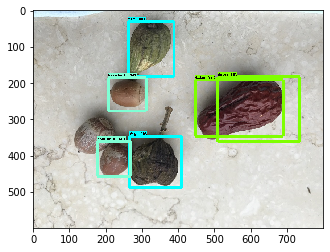

In [53]:
plt.imshow(image_np)